In [ ]:
!pip install pandas numpy matplotlib seaborn nltk scikit-learn textblob


In [2]:


# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/home/kali/Desktop/git/Financial-News-and-Stock-Price-Integration/Data/raw_analyst_ratings.csv'  # Update this path if needed
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Descriptive Statistics

Textual Lengths (Headline Length)

In [5]:
# Calculate the length of each headline
data['headline_length'] = data['headline'].apply(len)

# Descriptive statistics for headline lengths
headline_stats = data['headline_length'].describe()
headline_stats


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Count the Number of Articles per Publisher

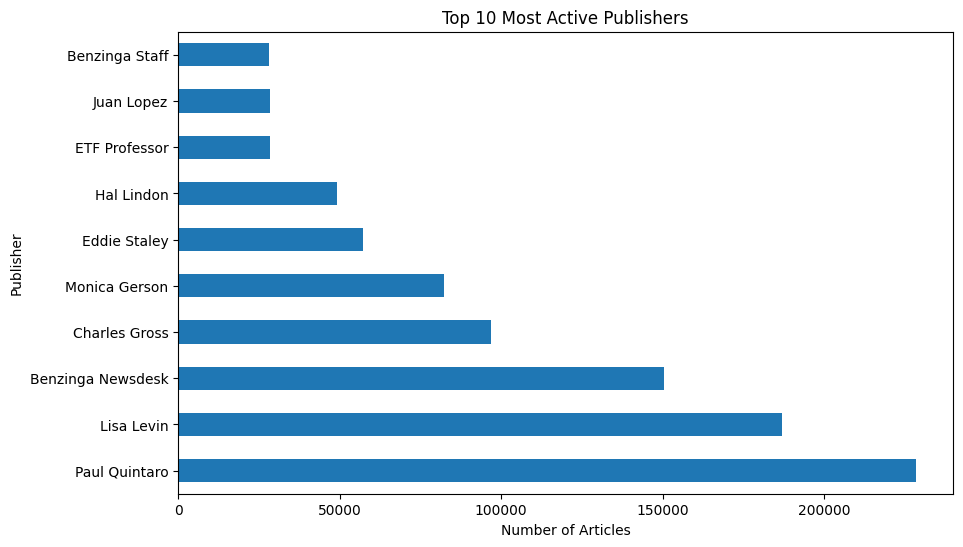

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

In [6]:
# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()

# Display top 10 most active publishers
publisher_counts.head(10).plot(kind='barh', figsize=(10, 6))
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.title("Top 10 Most Active Publishers")
plt.show()

publisher_counts.head(10)


Analyze Publication Dates

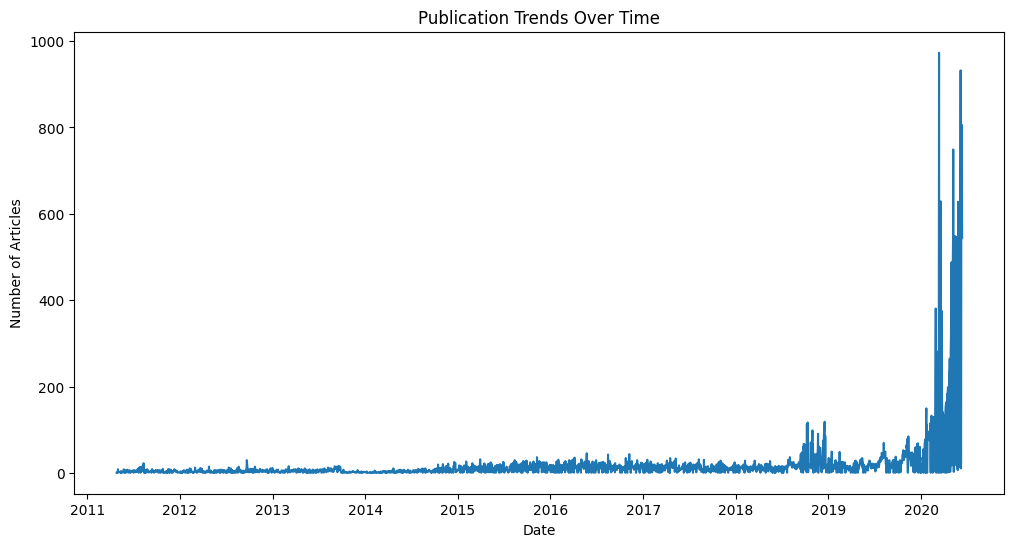

In [7]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Analyze trends over time
publication_trends = data['date'].dt.date.value_counts().sort_index()

# Plot the publication trends over time
plt.figure(figsize=(12, 6))
publication_trends.plot()
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.title("Publication Trends Over Time")
plt.show()


Analyze Publication Dates

 Sentiment Analysis on Headlines

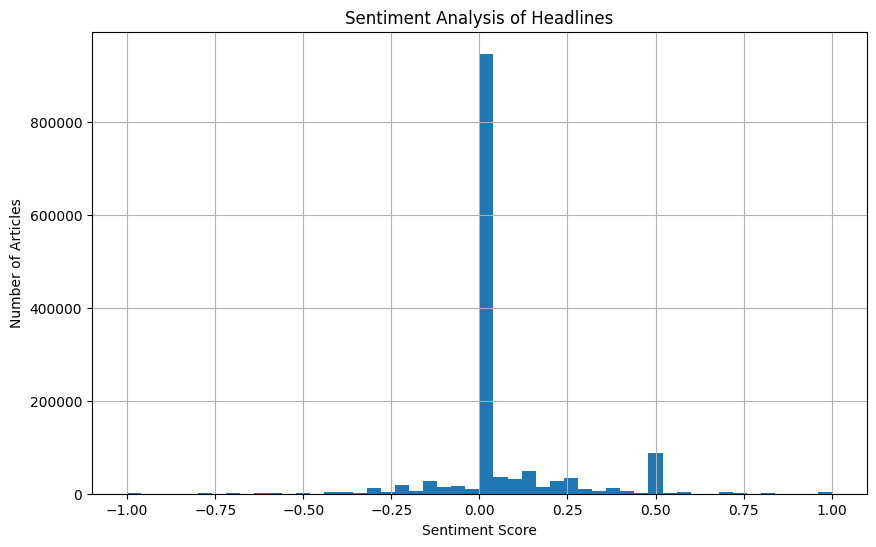

In [12]:
# Perform sentiment analysis
data['sentiment'] = data['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display basic sentiment statistics
sentiment_stats = data['sentiment'].describe()
sentiment_stats

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
data['sentiment'].hist(bins=50)
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.title("Sentiment Analysis of Headlines")
plt.show()


Topic Modeling 

In [3]:
# Extract keywords
vectorizer = CountVectorizer(max_df=0.9, min_df=10, stop_words='english')
X = vectorizer.fit_transform(data['headline'])
keywords = vectorizer.get_feature_names_out()

# Display top 10 keywords
keywords[:10]


array(['00', '000', '000b', '000k', '000m', '000th', '001', '001b',
       '001m', '002'], dtype=object)

Time Series Analysis

Publication Frequency Over Time

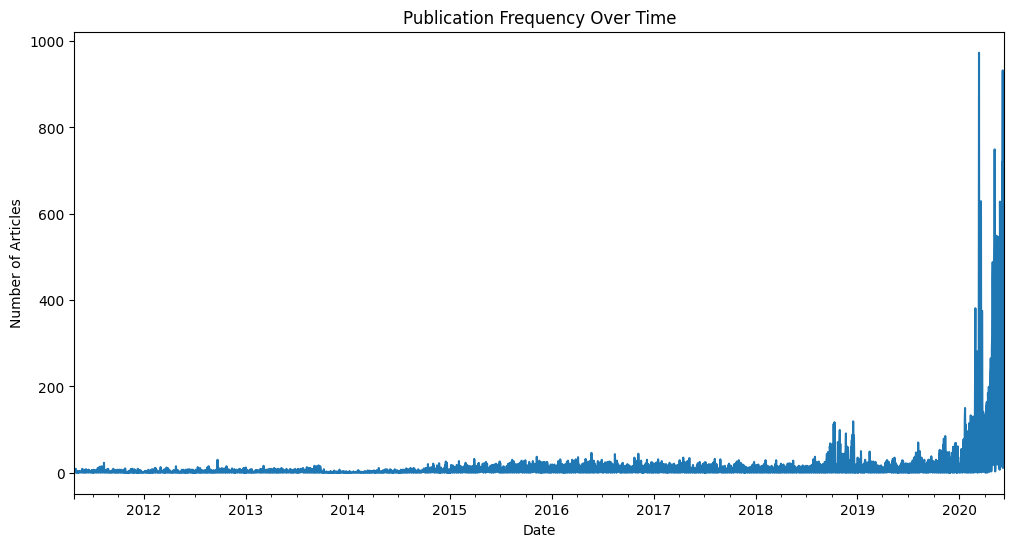

In [8]:
# Resample by day to see publication frequency
publication_frequency = data.set_index('date').resample('D').size()

# Plot publication frequency over time
plt.figure(figsize=(12, 6))
publication_frequency.plot()
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.title("Publication Frequency Over Time")
plt.show()


 Analysis of Publishing Times

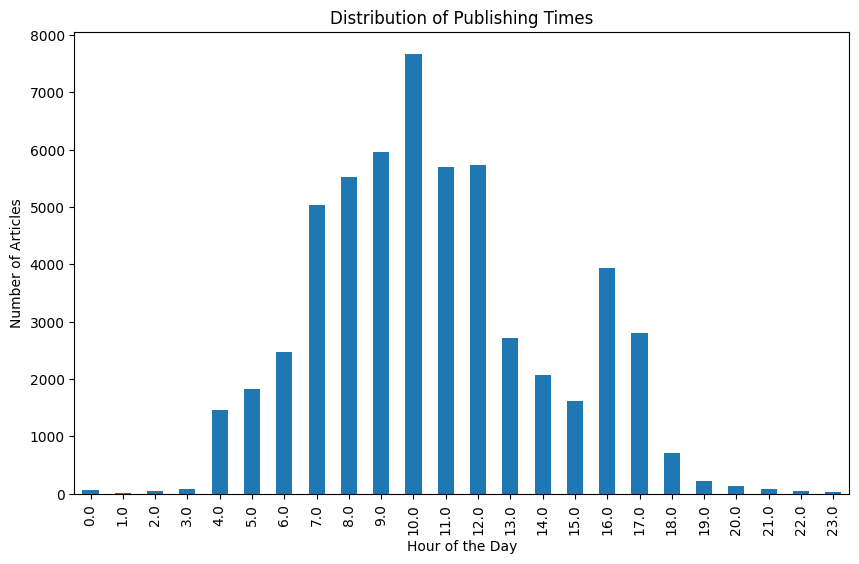

In [9]:
# Extract hour of publication
data['hour'] = data['date'].dt.hour

# Analyze distribution of publishing times
publishing_times = data['hour'].value_counts().sort_index()

# Plot publishing times distribution
plt.figure(figsize=(10, 6))
publishing_times.plot(kind='bar')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Articles")
plt.title("Distribution of Publishing Times")
plt.show()


Publisher Analysis

Contributions by Publishers

In [10]:
# Distribution of article counts by publisher
publisher_distribution = data['publisher'].value_counts()

# Display top 10 publishers by article count
publisher_distribution.head(10)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

Domain Analysis from Email Addresses

In [11]:
# Extract domain from email addresses (if applicable)
data['domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)

# Count articles by domain
domain_counts = data['domain'].value_counts()

# Display top 10 domains by article count
domain_counts.head(10)


domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64